# MPR121 Data Analysis Notebook
Author: Christopher Parker (parkecp@mail.uc.edu)

In [1]:
import h5py
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with h5py.File('raw_data_2025-04-01_11-45-46.h5', 'r') as h5f:
    cap_data = h5f['cap_data'][()]
    time_data = h5f['time_data'][()]

In [3]:
# cap_data = np.concat((cap_data[:,:1000],cap_data[:,2000:]), axis=1)
# time_data = np.concat((time_data[:,:1000],time_data[:,2000:]), axis=1)

In [4]:
for idx, row in enumerate(time_data):
    time_data[idx,:] = row - row[0]

In [5]:
# Make sure the time reads are monotonically increasing, if this
# errors something has gone wrong while recording the data
assert np.all([time_data[0,x] < time_data[0,x+1] for x in range(409999)])

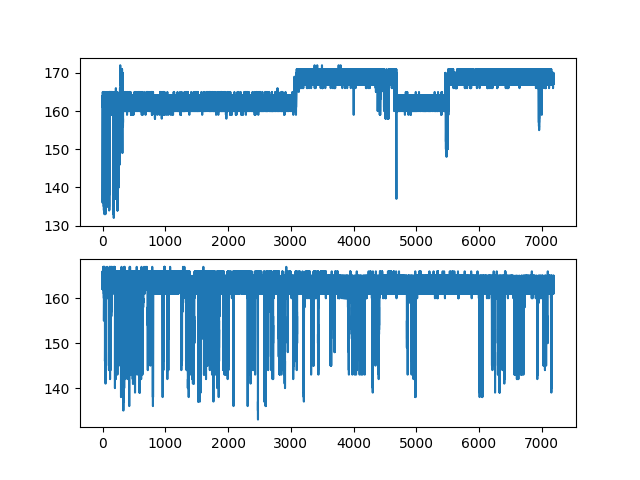

In [6]:
%matplotlib widget
fig, axes = plt.subplots(nrows=2)
for idx,ax in enumerate(axes):
    ax.plot(time_data[idx*2+1,:], cap_data[idx*2+1,:])

In [15]:
import scipy
b, a = scipy.signal.butter(4, [8, 12], btype='bandpass', fs=58)

In [20]:
filtered_data = scipy.signal.filtfilt(b, a, cap_data, axis=1)
for idx, sensor in enumerate(filtered_data):
    filtered_data[idx] = [0 if np.abs(x) < 5 else x for x in sensor]

In [21]:
filtered_data

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 7.44989155, 7.8175883 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(12, 422000))

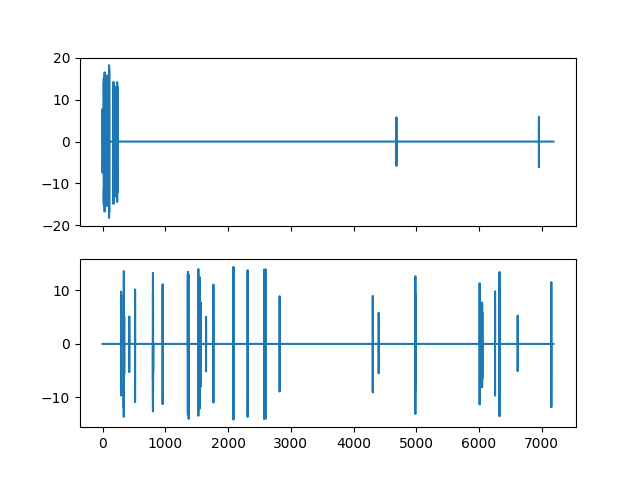

In [22]:
%matplotlib widget
fig, axes = plt.subplots(nrows=2, sharex=True)
for idx,ax in enumerate(axes):
    ax.plot(time_data[idx*2+1,:], filtered_data[idx*2+1,:])

In [23]:
time_data[0,-1]

np.float64(7185.953088283539)